In [1]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
import lightgbm as lgb


In [3]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

df = pd.concat([train_df, test_df], sort=False)
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


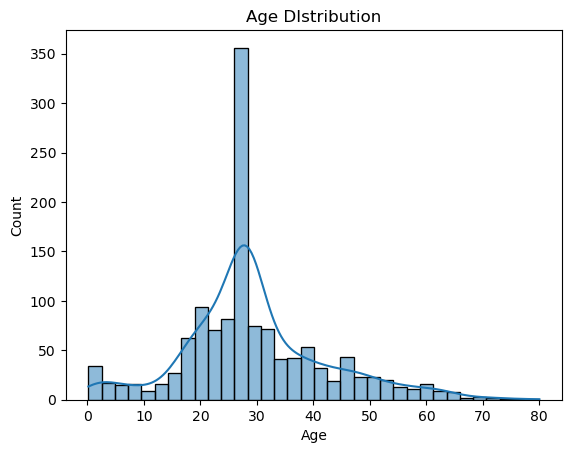

In [7]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age DIstribution')
plt.show()

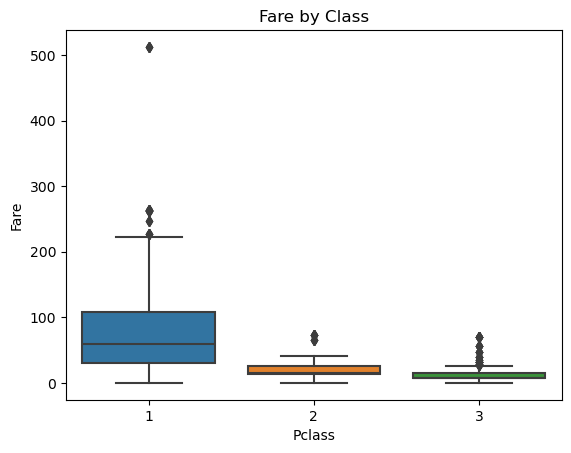

In [8]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Class')
plt.show()

In [9]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')


In [10]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])
df['Title'] = label.fit_transform(df['Title'])

In [11]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [12]:
train = df[:len(train_df)]
test = df[len(train_df):]

X = train.drop("Survived", axis=1)
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Model

In [14]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)

print("LightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgb))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# XGBoost Model

In [15]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [16]:
print("🔁 Cross-Validation Accuracy (LGBM):", cross_val_score(lgb_model, X, y, cv=5).mean())
print("🔁 Cross-Validation Accuracy (XGB):", cross_val_score(xgb_model, X, y, cv=5).mean())

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters:

🔁 Cross-Validation Accuracy (XGB): 0.8215617349821104


In [17]:
# LightGBM tuning
lgb_params = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_params, cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X, y)

print("Best LGBM Params:", lgb_grid.best_params_)
print("Best LGBM Score:", lgb_grid.best_score_)

# XGBoost tuning
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                        xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X, y)

print("Best XGB Params:", xgb_grid.best_params_)
print("Best XGB Score:", xgb_grid.best_score_)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
Best LGBM Params: {'learning_rate': 0.05, 'max_depth': -1, 'num_leaves': 31}
Best LGBM Score: 0.8462682819659783


C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:58:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best XGB Score: 0.8417613458037788


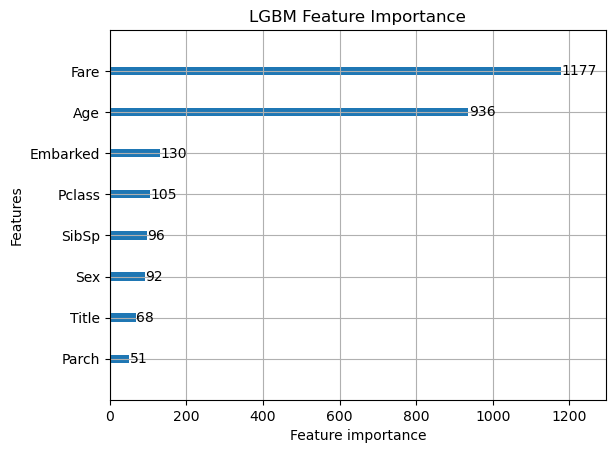

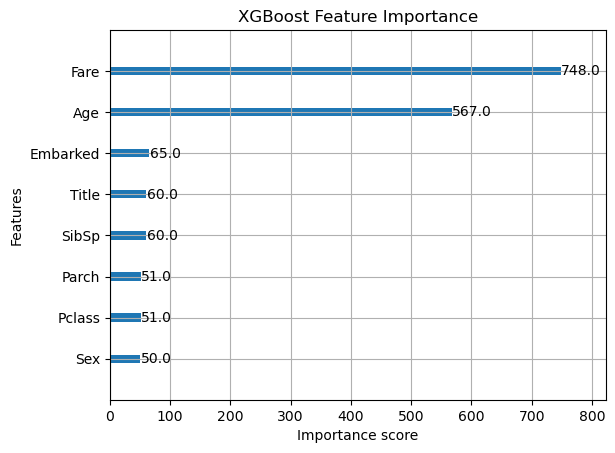

In [18]:
# LightGBM Feature Importance
lgb.plot_importance(lgb_model)
plt.title('LGBM Feature Importance')
plt.show()

# XGBoost Feature Importance
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.show()


# Conclusion 

Both models performed well.
LightGBM had slightly better cross-validation accuracy after tuning.
Feature importance plots show that Sex, Fare, and Title are strong predictors.
With hyperparameter tuning, both models improved their accuracy significantly.